# Prediction Using Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
df = pd.read_csv(r'C:\Users\yesia\Downloads\archive\car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
# we will check fuel type and transmission

print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [11]:
# encoding the categorical type data

df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace = True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace = True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace = True)

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [13]:
# splitting the data set into training and test data

X=df.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = df['Selling_Price']

In [14]:
# train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)


In [15]:
# model training

# linear Regression
lr= LinearRegression()

In [16]:
lr.fit(X_train, Y_train)

LinearRegression()

In [17]:
# evaluating the model

training_data_prediction = lr.predict(X_train)

In [20]:
# using r square error method

error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Square error:",error_score)

R Square error: 0.8799451660493698


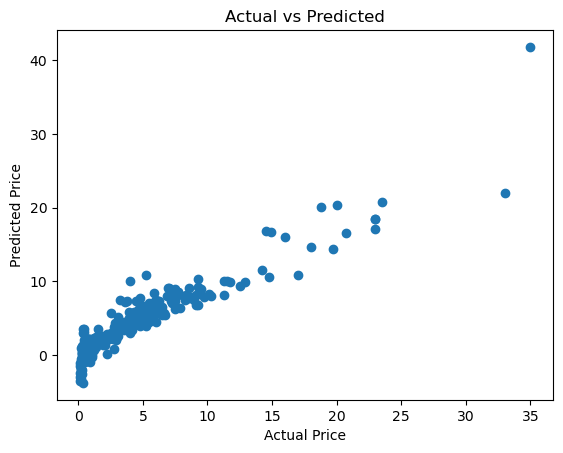

In [21]:
# visualize the actual price and predicted price

plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

In [22]:
test_data_prediction = lr.predict(X_test)


In [23]:
error = metrics.r2_score(Y_test, test_data_prediction)
print("R Square error:",error)

R Square error: 0.8365766715026903


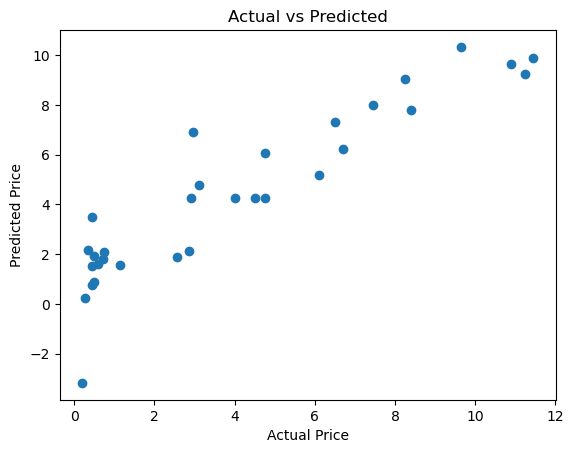

In [24]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

In [25]:
# performing lasso regression

lasso_reg = Lasso()

In [26]:
lasso_reg.fit(X_train, Y_train)

Lasso()

In [27]:
train_data=lasso_reg.predict(X_train)

In [28]:
error_s=metrics.r2_score(Y_train, train_data)
print("error score from lasso =", error_s)

error score from lasso = 0.8427856123435794


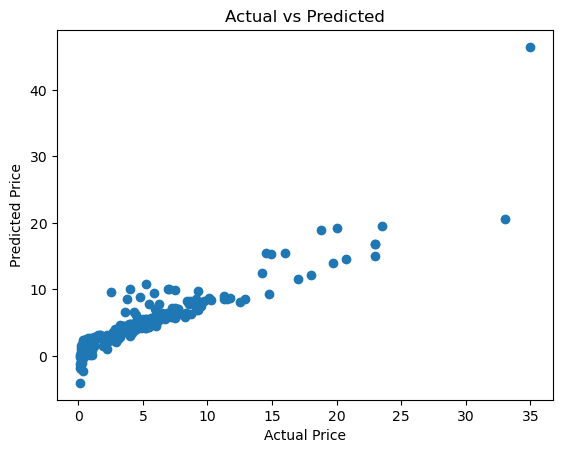

In [29]:
plt.scatter(Y_train,train_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

In [30]:
test_data=lasso_reg.predict(X_test)

In [32]:
errors=metrics.r2_score(Y_test, test_data)
print("error score from lasso =", errors)

error score from lasso = 0.8709167941173195


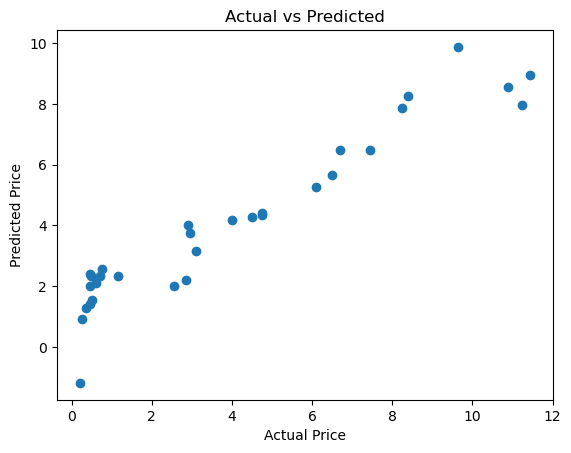

In [33]:
plt.scatter(Y_test,test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()